In [240]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pickle

In [241]:
results = pd.read_csv('test-log.csv')

In [242]:
results.shape # 55665 samples

(55665, 13)

In [243]:
for view in range(0, 12):
    print(f"View {view} mean: {results[f'prune_v{view}'].mean()}")

View 0 mean: 0.4982153956705291
View 1 mean: 0.5003880355699272
View 2 mean: 0.49990838049043385
View 3 mean: 0.5001907841552142
View 4 mean: 0.5021927602622832
View 5 mean: 0.5013272253660289
View 6 mean: 0.500166711578191
View 7 mean: 0.5007038534087846
View 8 mean: 0.49934968112817746
View 9 mean: 0.49889481721009615
View 10 mean: 0.5014982484505525
View 11 mean: 0.5014227970897331


In [244]:
X = results.iloc[:, :-1].values
Y = results.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, shuffle=True)

In [245]:
[X.shape, Y.shape], [X_train.shape, y_train.shape], [X_test.shape, y_test.shape]

([(55665, 12), (55665,)], [(41748, 12), (41748,)], [(13917, 12), (13917,)])

In [246]:
model = XGBRegressor(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method='hist'
)

In [247]:
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [248]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [249]:
y_pred = model.predict(X_test)

In [ ]:
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print(f"Accuracy: {model.score(X_test, y_test)*100:.2f}%")

R2 Score: 0.9651937739374904
MSE: 0.002636112306435428
Accuracy: 96.52%


In [251]:
importance = model.feature_importances_

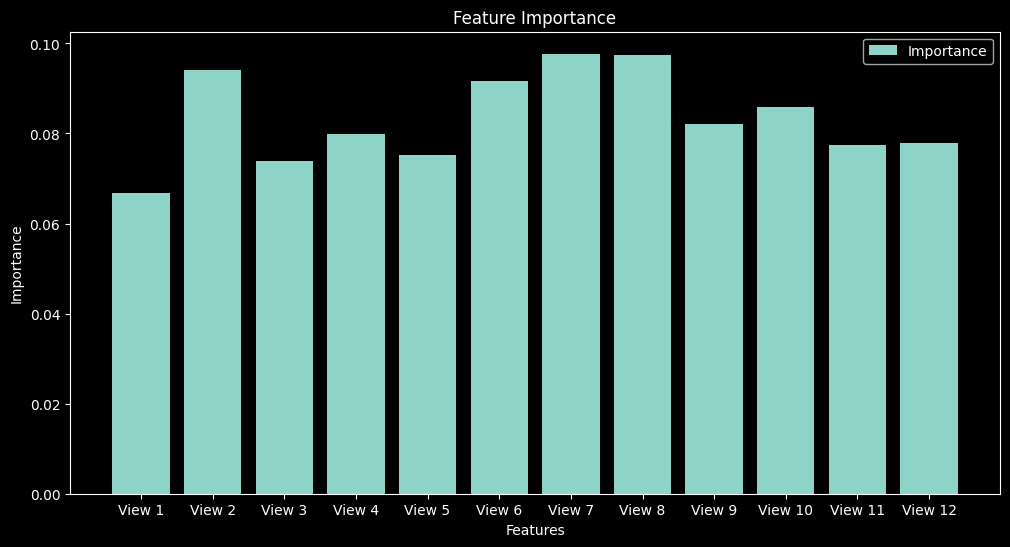

In [252]:
plt.figure(figsize=(12, 6))
plt.bar(range(len(importance)), importance, tick_label=[f'View {i+1}' for i in range(len(importance))])
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.legend(['Importance'])
plt.show()

In [253]:
input_data = [[1.0]*12]

In [254]:
model.predict(input_data)

array([0.7336583], dtype=float32)

In [255]:
print("\n".join([model.get_booster().get_dump()[i] for i in range(20)]))

0:[f10<1] yes=1,no=2,missing=2
	1:[f3<1] yes=3,no=4,missing=4
		3:[f11<1] yes=7,no=8,missing=8
			7:[f9<1] yes=9,no=10,missing=10
				9:leaf=0.0044318079
				10:leaf=-0.0523617044
			8:leaf=-0.0537090562
		4:leaf=-0.0528352857
	2:[f11<0.5] yes=5,no=6,missing=6
		5:leaf=-0.0499915294
		6:leaf=-0.055179622

0:[f2<1] yes=1,no=2,missing=2
	1:[f8<1] yes=3,no=4,missing=4
		3:[f4<1] yes=7,no=8,missing=8
			7:[f1<1] yes=11,no=12,missing=12
				11:leaf=0.00440075388
				12:leaf=-0.0513920076
			8:[f11<0.479999989] yes=13,no=14,missing=14
				13:leaf=-0.0495328978
				14:leaf=-0.0538854785
		4:[f11<0.340000004] yes=9,no=10,missing=10
			9:leaf=-0.0493615381
			10:leaf=-0.0539623685
	2:[f11<0.479999989] yes=5,no=6,missing=6
		5:leaf=-0.0501562059
		6:leaf=-0.0546610132

0:[f7<1] yes=1,no=2,missing=2
	1:[f5<1] yes=3,no=4,missing=4
		3:[f6<1] yes=5,no=6,missing=6
			5:[f10<1] yes=7,no=8,missing=8
				7:leaf=0.00414299453
				8:leaf=-0.0475104861
			6:[f11<0.479999989] yes=9,no=10,missing=10
				9:l

In [256]:
with open('xgboost_model.pkl', 'wb') as f:
    pickle.dump(model, f)